# TP1
## Descente de gradient en 2 variables

### Import des librairies

In [8]:
from matplotlib import pyplot as plt
import numpy as np

> Fonction python permettant de dessiner les courbes de niveaux d'une fonction de 2 variables

In [9]:
def courbes_de_niveaux(fct, x1_min=-5, x2_min=-5, x1_max=5, x2_max=5):
    x1_values = np.linspace(x1_min, x1_max,100)
    x2_values = np.linspace(x2_min, x2_max,100)
    fct_values = np.array([[fct(x1,x2) for x1 in x1_values] for x2 in x2_values])    
    plt.contour(x1_values, x2_values, fct_values, 40)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.colorbar()
    plt.xlabel('$b$')
    plt.ylabel('$w_1$')



> Fonction Python permettant de dessiner la trajectoire de l'algorithme

In [74]:
# W sous la forme d'une liste  coordonnées [[w00,b0],[w01,b1],...]
def trajectoire(W, fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5, w_opt=None, ax=None):
    courbes_de_niveaux(fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5)     
    if len(W) > 0:
        trajet = np.array(W)
        plt.plot(trajet[:,0], trajet[:,1], 'o--')
    plt.title('Trajectoire de la descente de gradient')
    plt.axis('equal')


### Fonction $f(b,w_1)$ à optimiser et son gradient

Ci-dessous, on cherche à minimiser la fonction
$$f(b,w_1)=(3w_1+b-4)^2+(1w_1+b-0)^2+(7w_1+b-6)^2.$$

Cette fonction représente la somme des carrés des distances entre $b+w_1x_i$ et $y_i$, avec
$(x_1,y_1)=(3,4)$, $(x_2,y_2)=(1,0)$ et $(x_3,y_3)=(7,6)$.

La solution $(b^*,w_1^*)$ est donc la droite de régression de $y$ selon $x$.

Le gradient de cette fonction est 
$$\begin{array}{l}[\text{grad} f](b,w_1)\\
=\big(2(3w_1+b-4)+2(1w_1+b-0)+2(3w_1+b-4)+2(7w_1+b-6),\\
\qquad 2(3w_1+b-4)\times 3+2(1w_1+b-0)\times 1+2(3w_1+b-4)\times 3+2(7w_1+b-6)^2\times 7\big)
\end{array}$$


In [4]:
# Fonction à optimiser
def f(b,w1):
  return (w1*3+b-4)**2+(w1*1+b-0)**2+(w1*7+b-6)**2

# Gradient
def df(b,w1):
  return [2*(w1*3+b-4)*1+2*(w1*1+b-0)*1+2*(w1*7+b-6)*1,2*(w1*3+b-4)*3+2*(w1*1+b-0)*1+2*(w1*7+b-6)*7]

### Représentation graphique de $f$

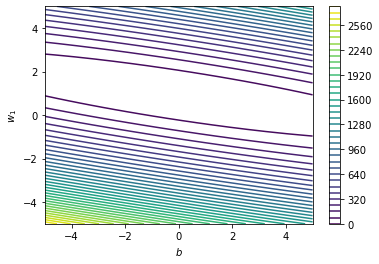

In [5]:
courbes_de_niveaux(f)

### Exercice
1. À partir des courbes de niveau de $f$ :
    1. Quelles sont approximativement les coordonnées du point critique ?
    2. Quels sont les signes du gradient (parmi $(+,+)$, $(-,-)$, $(+,-)$ ou $(-,+)$) en chacun des points suivants : (a) $W=(-2,3)$ ; (b) $W=(2,-2)$ ; (c) $W=(0,-4)$.
    3. Comment interpréter la forte horizontalité des courbes de niveau ? Qu'est-ce qui l'explique ?
2. Déterminer la valeur exacte $W^*$ du point critique.
3. En partant de $W_0=(b,w_1)=(-2,2)$, et d'après `df(-2,2)=[12, 84]` :
    1. Quelle est la valeur $W_1$ oobtenu lors de la première itération de l'algorithme de descente, dans les cas : (a) $\tau=1$ ; (b) $\tau=1e-2$ ; (c) $\tau=1e-5$.
    2. Parmi ces valeur de $\tau$, quelle est la valeur minimisant la distance entre $W_1$ et $W^*$ ?

## Algorithme

In [33]:
def descente(gradf,W0,tau=0.01,tolerance=1e-6,nbiterations=1000):
    b=W0[0]
    w=W0[1]
    L=[]
    for i in range(nbiterations):
        g = gradf(b,w)
        if g[0]**2+g[1]**2< tolerance:
            print('L\'algorithme a convergé en',i,'itérations. \nSolution atteinte :\n b=',b,'\n w_1=',w,'\nGradient :',g)
            return L
        L.append([b,w])
        b=b-tau*g[0]
        w=w-tau*g[1]
    print('L\'algorithme n\'a pas convergé.\n Solution atteinte :\n b=',b,'\n w_1=',w,'\nGradient :',g)
    return L

### Calcul de la solution

In [72]:
W=descente(df,[-4,4],1e-3,1e-4,10000)

L'algorithme a convergé en 3651 itérations. 
Solution atteinte :
 b= -0.07678545419578892 
 w_1= 0.9295859334931027 
Gradient : [-0.009822188326473746, 0.0018601598787650886]


### Exercice
1. Représenter les données d'apprentissage ainsi que la droite de régression dans un repère.
2. Quelle est la valeur estimée de $y$ lorsque $x=1$, $x=3$, $x=5$, ou $x=7$ ?

### Représentation graphique de la trajectoire

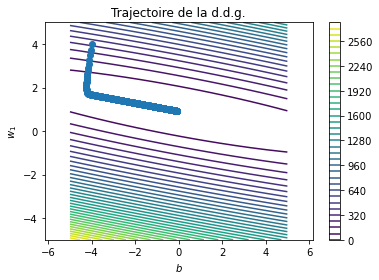

In [73]:
trajectoire(W,f)

### Exercice
1. À partir de $W_0=(-4,4)$, et avec $\tau=1e-3$, donner, à 4 décimales près, la tolérance en-deçà de laquelle l'algorithme ne converge pas en au plus 3000 itération.
2. À partir de $W_0=(-4,4)$, visualiser et interpréter la trajectoire dans les cas suivants :
    1. $\tau=0.015$, tolerance=1e-2, nbiterations=1000 ;
    2. $\tau=0.02$, tolerance=1e-2, nbiterations=5

### Exercice

1. Placer les points $(1,6)$, $(2,8)$, $(3,7)$, $(4,9)$ dans un repère du plan.
2. Modifier ce notebook afin de déterminer l'équation de la droite de régression de Y selon X.
3. Représenter cette droite dans le graphique de la question 1.
4. D'après cette droite,
